# Models and Predictions

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import imblearn
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

sb.set() 

In [2]:
#Retrieving the cleaned dataset
url = 'https://raw.githubusercontent.com/aneezJaheez/Predicting-Aviation-Accidents-and-Injuries/main/Data/cleaned_aviation_dataset_final.csv'
aviationData = pd.read_csv(url,encoding = "ISO-8859-1")
aviationData = aviationData.drop("Unnamed: 0", axis = 1)

# Prediction of aircraft damage using altitude and passenger count

In [3]:
aviationData

,Altitude,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Total.Passengers
0,367.2,39.164723,-96.610412,INCIDENT,MINOR,3,TURBO FAN,UNKNOWN,0,0,0,588,VMC,STANDING,588
1,367.2,39.164723,-96.610412,INCIDENT,MINOR,4,TURBO FAN,UNKNOWN,0,0,0,588,VMC,TAXI,588
2,202.7,41.968611,-87.907778,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,0,0,0,501,VMC,STANDING,501
3,202.7,41.968611,-87.907778,NON-FATAL,MINOR,2,TURBO FAN,UNKNOWN,0,0,0,501,VMC,TAXI,501
4,215.4,35.213611,-80.948889,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,0,0,0,454,VMC,STANDING,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,367.2,39.164723,-96.610412,NON-FATAL,DESTROYED,1,RECIPROCATING,PERSONAL,0,0,0,1,VMC,LANDING,1
12950,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,BUSINESS,0,0,0,1,VMC,TAXI,1
12951,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,UNKNOWN,0,0,0,1,VMC,LANDING,1
12952,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,2,RECIPROCATING,UNKNOWN,0,0,1,0,VMC,TAKEOFF,1


In [4]:
# Extract Response and Predictors
y = pd.DataFrame(aviationData["Aircraft.Damage"])
X = pd.DataFrame(aviationData[["Altitude", "Latitude", "Longitude", "Total.Uninjured", "Total.Passengers"]])

In [5]:
y.columns = ['AircraftDamage']
X.columns = ['Altitude', 'Latitude', 'Longitude', 'TotalUninjured', 'TotalPassengers']
pd.DataFrame(y.AircraftDamage.value_counts())

,AircraftDamage
SUBSTANTIAL,10837
DESTROYED,1680
MINOR,437


In [6]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (10363, 1) (10363, 5)
Test Set  : (2591, 1) (2591, 5)


/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AircraftDamage', ylabel='count'>

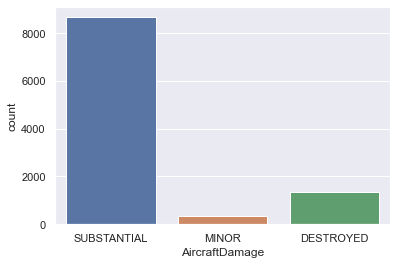

In [7]:
sb.countplot(y_train["AircraftDamage"])

In [8]:
columns = X_train.columns.tolist()
target = 'AircraftDamage'
state = np.random.RandomState(42)
print(X_train.shape)
print(y_train.shape)

(10363, 5)
(10363, 1)


In [9]:
pd.DataFrame(y_train.AircraftDamage.value_counts())

,AircraftDamage
SUBSTANTIAL,8672
DESTROYED,1338
MINOR,353


In [10]:
#Near Miss instance for data balancing by oversampling minority classes
nm = NearMiss()
smk = SMOTETomek(random_state = 42)
X_train, y_train = smk.fit_resample(X_train, y_train)

In [11]:
pd.DataFrame(y_train.AircraftDamage.value_counts())

,AircraftDamage
MINOR,8492
DESTROYED,8359
SUBSTANTIAL,8311


In [12]:
# Summary Statistics for Predictors
X_train.describe()

,Altitude,Latitude,Longitude,TotalUninjured,TotalPassengers
count,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000
mean,3031.608271,38.447119,-95.084468,19.634131,21.048605
std,4733.618284,7.966467,26.192619,60.145454,60.487138
min,0.000000,-78.016945,-171.734722,0.000000,1.000000
25%,236.343765,35.992650,-98.349267,0.000000,1.000000
50%,367.200000,39.164723,-96.610412,1.000000,2.000000
75%,2024.950000,39.861667,-87.716101,3.000000,4.000000
max,12534.600000,70.489722,165.147777,588.000000,588.000000


/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AircraftDamage', ylabel='count'>

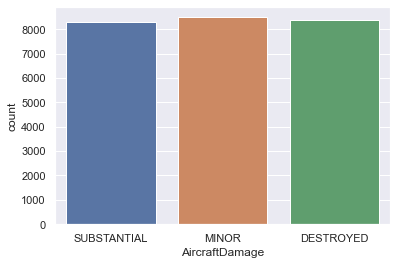

In [13]:
# Draw the distribution of Response
sb.countplot(y_train["AircraftDamage"])

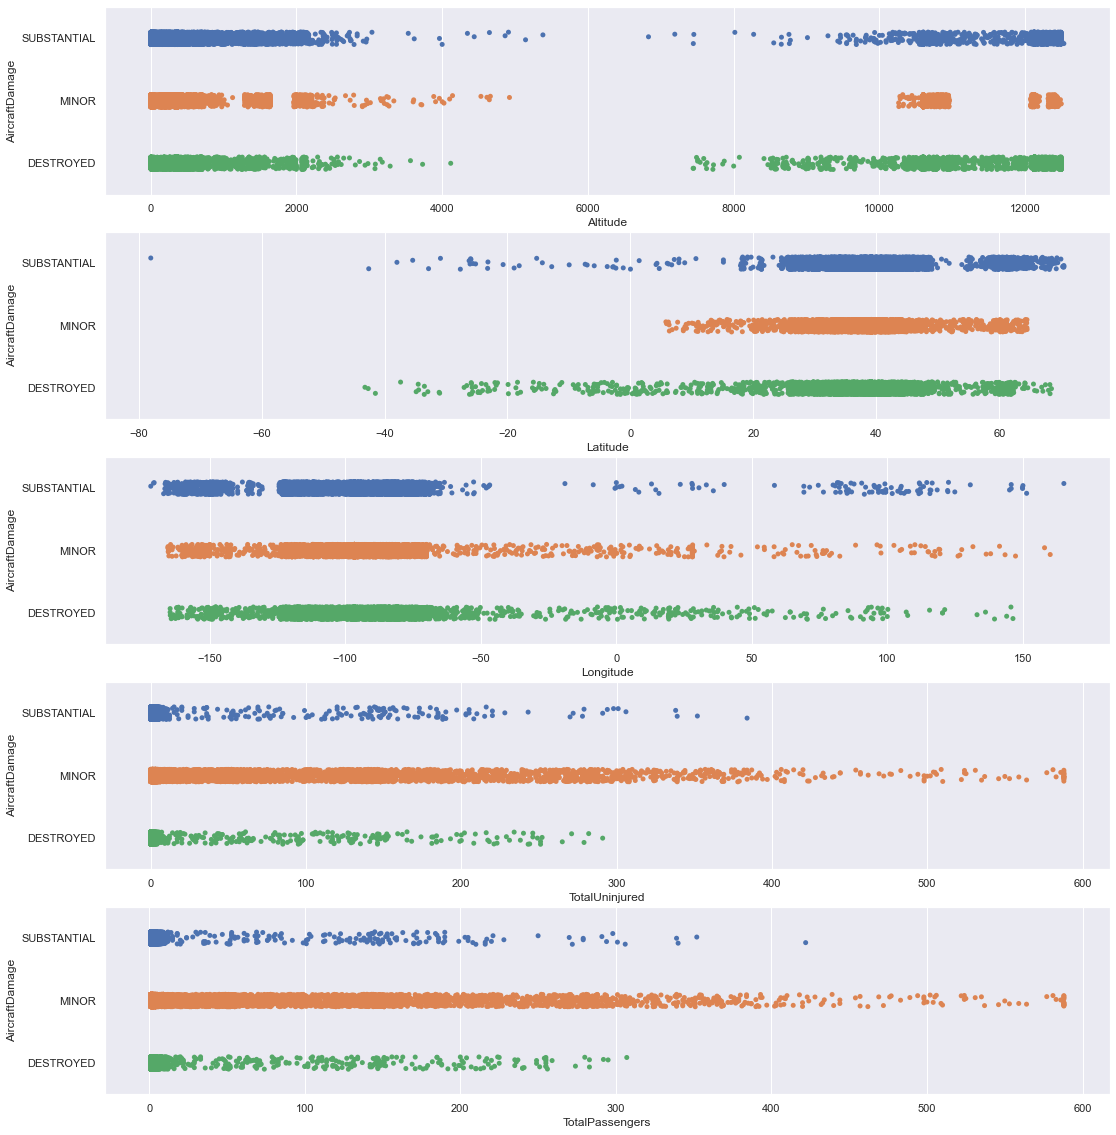

In [14]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(5, 1, figsize=(18, 20))

count = 0
for var in X_train:
    sb.stripplot(x = var, y = "AircraftDamage", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

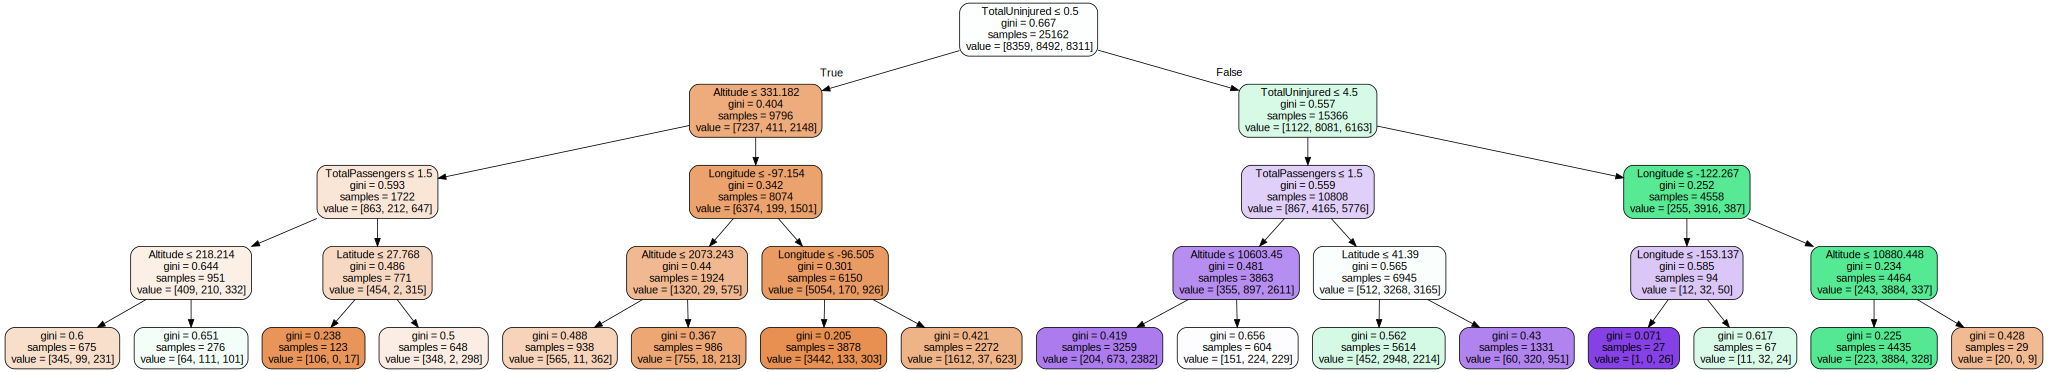

In [16]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 70.56672760511883 %

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 50.0578927055191 %



<AxesSubplot:>

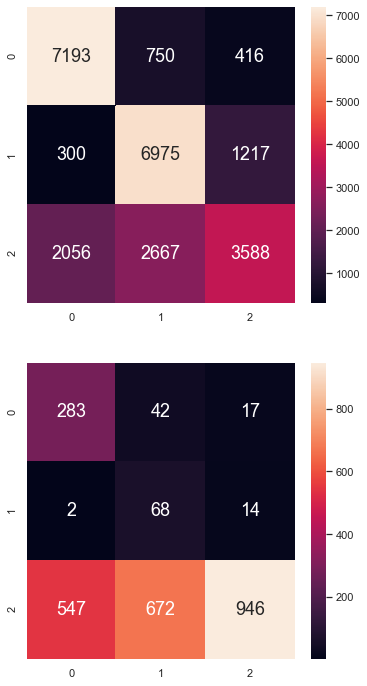

In [17]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train)*100, "%")
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test)*100,"%")
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(6, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [18]:
#Boosting the base tree with AdaBoost
AdaBoost = AdaBoostClassifier(base_estimator = dectree, 
                              n_estimators = 175, learning_rate = 0.3)
boostModel = AdaBoost.fit(X_train,y_train)

pred = boostModel.predict(X_train)
predictions = metrics.accuracy_score(y_train,pred)
print("prediction accuracy of train set is: ",predictions*100,"%")

pred = boostModel.predict(X_test)
predictions = metrics.accuracy_score(y_test,pred)
print("prediction accuracy of test set is: ",predictions*100,"%")

/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


prediction accuracy of train set is:  79.94595024242906 %
prediction accuracy of test set is:  68.35198764955615 %


# Linear Regression to predict Fatal/Serious/Minor injuries

In [19]:
linreg = LinearRegression()

In [20]:
aviationData['Total.Passengers'] = aviationData["Total.Passengers"].astype(float)

In [21]:
predictors = pd.DataFrame(aviationData[['Total.Passengers', 'Altitude']])
predictors.head()

,Total.Passengers,Altitude
0,588.0,367.2
1,588.0,367.2
2,501.0,202.7
3,501.0,202.7
4,454.0,215.4


Intercept of Regression 	: b =  [0.214182]
Coefficients of Regression 	: a =  [[1.36944403e-02 5.03234804e-05]]

         Predictors  Coefficients
0  Total.Passengers      0.013694
1          Altitude      0.000050



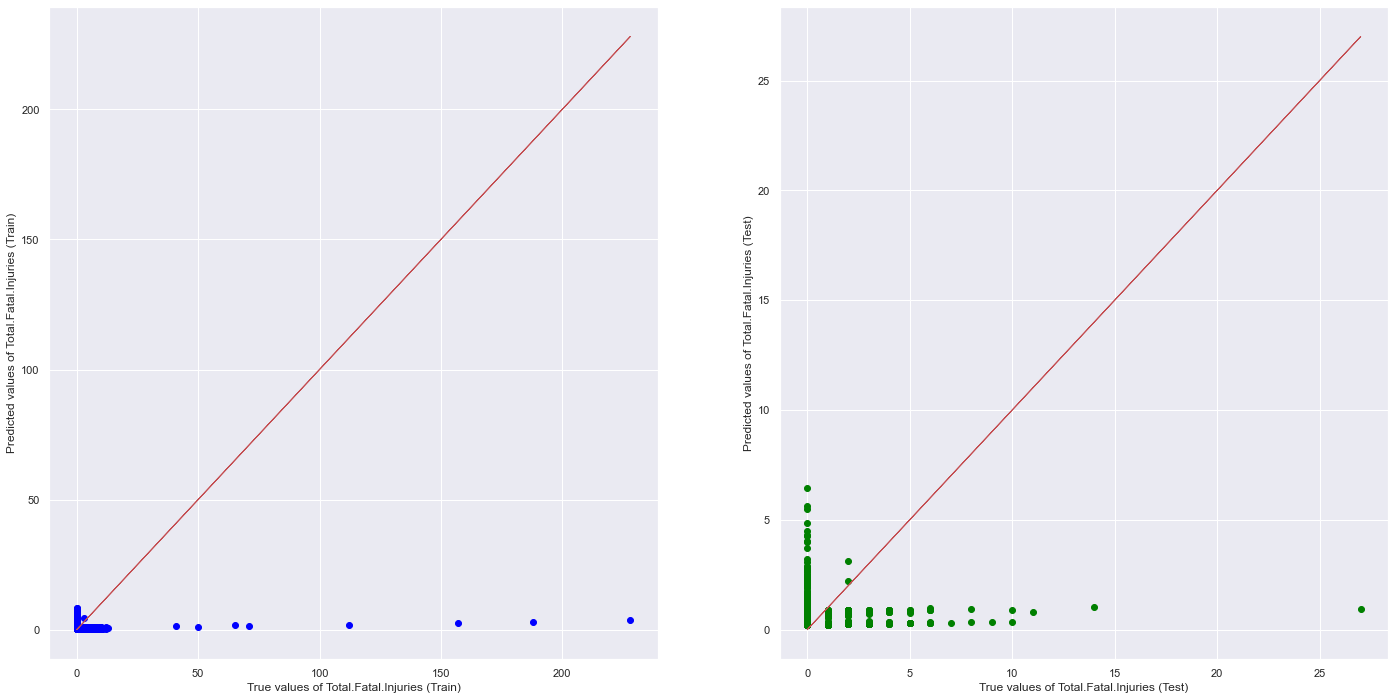

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.015076255943056838
Mean Squared Error (MSE) 	: 13.989157227955758

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.07976232629214541
Mean Squared Error (MSE) 	: 1.4073399469595584



In [22]:
x = predictors
y = pd.DataFrame(aviationData["Total.Fatal.Injuries"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)
linreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of Total.Fatal.Injuries (Train)")
axes[0].set_ylabel("Predicted values of Total.Fatal.Injuries (Train)")


axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of Total.Fatal.Injuries (Test)")
axes[1].set_ylabel("Predicted values of Total.Fatal.Injuries (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [0.13564726]
Coefficients of Regression 	: a =  [[3.49731009e-03 7.19331615e-06]]

         Predictors  Coefficients
0  Total.Passengers      0.003497
1          Altitude      0.000007



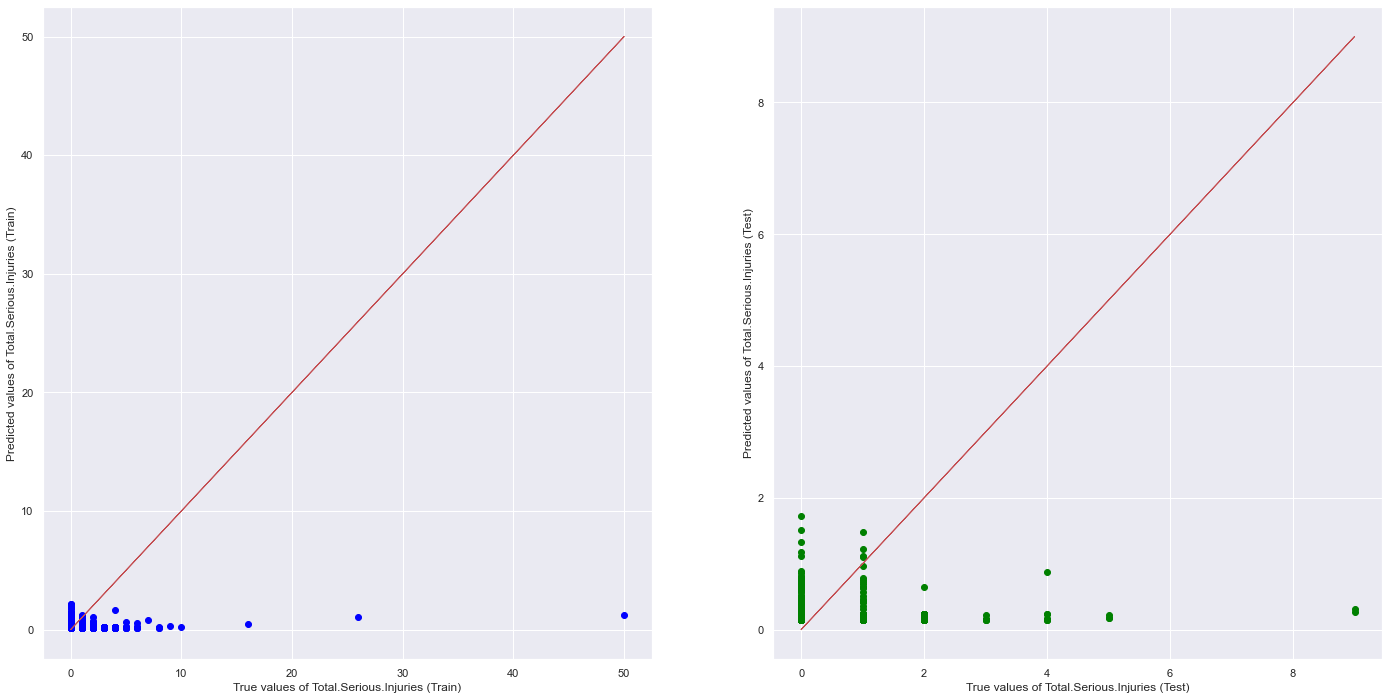

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.018493588530821836
Mean Squared Error (MSE) 	: 0.6407767313329855

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.003005672561000927
Mean Squared Error (MSE) 	: 0.31728547291084563



In [23]:
x = predictors
y = pd.DataFrame(aviationData["Total.Serious.Injuries"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

linreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of Total.Serious.Injuries (Train)")
axes[0].set_ylabel("Predicted values of Total.Serious.Injuries (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of Total.Serious.Injuries (Test)")
axes[1].set_ylabel("Predicted values of Total.Serious.Injuries (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [0.2266774]
Coefficients of Regression 	: a =  [[1.10712188e-02 4.78371507e-06]]

         Predictors  Coefficients
0  Total.Passengers      0.011071
1          Altitude      0.000005



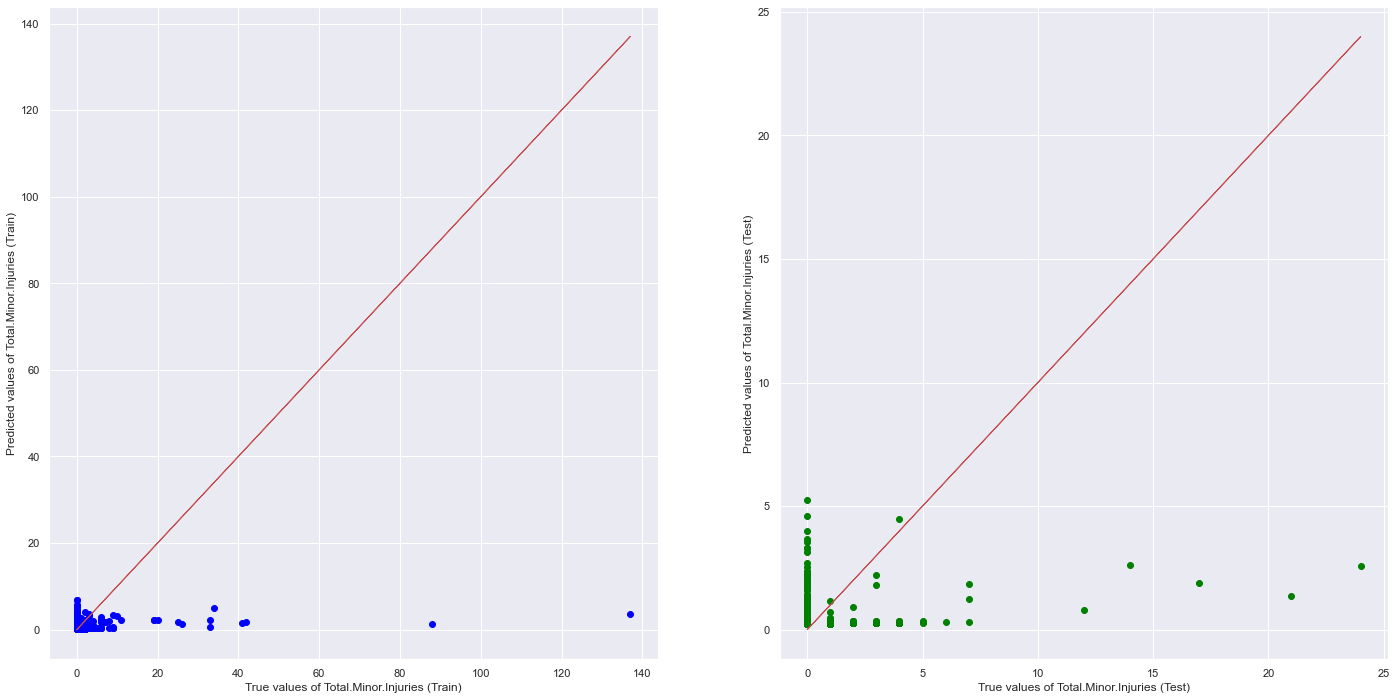

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.029023836604770925
Mean Squared Error (MSE) 	: 3.810693696262364

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.027176950044232262
Mean Squared Error (MSE) 	: 1.1101618591637585



In [24]:
x = predictors
y = pd.DataFrame(aviationData["Total.Minor.Injuries"])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

linreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of Total.Minor.Injuries (Train)")
axes[0].set_ylabel("Predicted values of Total.Minor.Injuries (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of Total.Minor.Injuries (Test)")
axes[1].set_ylabel("Predicted values of Total.Minor.Injuries (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [47]:
maneuvering = pd.DataFrame(aviationData[aviationData["Broad.Phase.of.Flight"] == 'MANEUVERING'])
maneuvering

,Altitude,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Total.Passengers
359,10604.8,55.425556,-131.505000,FATAL,SUBSTANTIAL,1,TURBO PROP,UNKNOWN,6,9,1,0,VMC,MANEUVERING,16.0
360,10604.8,55.425556,-131.505000,FATAL,DESTROYED,1,RECIPROCATING,UNKNOWN,6,9,1,0,VMC,MANEUVERING,16.0
368,12194.7,45.950000,-112.483333,FATAL,SUBSTANTIAL,1,TURBO PROP,PERSONAL,14,0,0,0,VMC,MANEUVERING,14.0
374,10604.8,9.865278,-85.366111,FATAL,DESTROYED,1,TURBO PROP,UNKNOWN,12,0,0,0,VMC,MANEUVERING,12.0
400,12496.8,46.587222,-121.352222,FATAL,DESTROYED,1,TURBO PROP,PERSONAL,10,0,0,0,IMC,MANEUVERING,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12903,10907.0,7.901111,8.322778,NON-FATAL,SUBSTANTIAL,4,UNKNOWN,UNKNOWN,0,0,1,0,VMC,MANEUVERING,1.0
12907,12369.8,44.357778,-122.917778,NON-FATAL,SUBSTANTIAL,4,UNKNOWN,PERSONAL,0,1,0,0,VMC,MANEUVERING,1.0
12909,9956.2,48.980278,-118.017778,NON-FATAL,SUBSTANTIAL,1,TURBO PROP,PUBLIC AIRCRAFT,0,1,0,0,VMC,MANEUVERING,1.0
12911,10936.0,22.451944,114.226667,NON-FATAL,SUBSTANTIAL,4,UNKNOWN,UNKNOWN,0,1,0,0,VMC,MANEUVERING,1.0


In [48]:
maneuvering['Injury.Severity'].value_counts()

FATAL        487
NON-FATAL    365
INCIDENT       7
Name: Injury.Severity, dtype: int64

In [49]:
maneuvering['Aircraft.Damage'].value_counts()

SUBSTANTIAL    568
DESTROYED      281
MINOR           10
Name: Aircraft.Damage, dtype: int64

<AxesSubplot:xlabel='Total.Passengers', ylabel='count'>

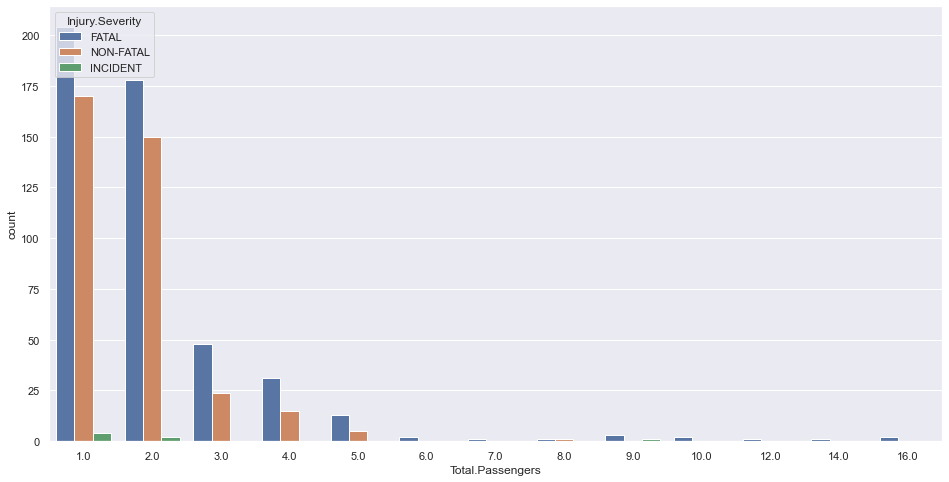

In [50]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.countplot(x = 'Total.Passengers', hue = 'Injury.Severity', data = maneuvering)

In [51]:
more = pd.DataFrame(aviationData[aviationData['Total.Passengers'] > 15])
less = pd.DataFrame(aviationData[aviationData['Total.Passengers'] < 15])
more

,Altitude,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Total.Passengers
0,367.2,39.164723,-96.610412,INCIDENT,MINOR,3,TURBO FAN,UNKNOWN,0,0,0,588,VMC,STANDING,588.0
1,367.2,39.164723,-96.610412,INCIDENT,MINOR,4,TURBO FAN,UNKNOWN,0,0,0,588,VMC,TAXI,588.0
2,202.7,41.968611,-87.907778,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,0,0,0,501,VMC,STANDING,501.0
3,202.7,41.968611,-87.907778,NON-FATAL,MINOR,2,TURBO FAN,UNKNOWN,0,0,0,501,VMC,TAXI,501.0
4,215.4,35.213611,-80.948889,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,0,0,0,454,VMC,STANDING,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,355.8,38.748611,-90.370000,NON-FATAL,SUBSTANTIAL,4,UNKNOWN,UNKNOWN,0,0,0,33,VMC,APPROACH,33.0
12509,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,4,TURBO FAN,UNKNOWN,0,0,3,28,VMC,LANDING,31.0
12510,304.8,39.164723,-96.610412,INCIDENT,MINOR,4,UNKNOWN,UNKNOWN,0,0,0,23,VMC,LANDING,23.0
12511,663.3,8.823611,-75.825834,INCIDENT,SUBSTANTIAL,2,TURBO PROP,UNKNOWN,0,0,0,18,VMC,CLIMB,18.0


In [52]:
more['Injury.Severity'].value_counts()
print("NONFATAL: ", 245/442 * 100)
print("INCIDENT: ", 180/442 * 100)
print("FATAL: ", 17/442 * 100)

NONFATAL:  55.42986425339367
INCIDENT:  40.723981900452486
FATAL:  3.8461538461538463


In [53]:
aviationData['Injury.Severity'].value_counts()
print("NONFATAL: ", 10341/12954 * 100)
print("FATAL: ", 2177/12954 * 100)
print("INCIDENT: ", 436/12954 * 100)

NONFATAL:  79.82862436313108
FATAL:  16.805619885749575
INCIDENT:  3.3657557511193454


In [54]:
less['Injury.Severity'].value_counts()
print("NONFATAL: ", 10093/12507 * 100)
print("FATAL: ", 2159/12507 * 100)
print("INCIDENT: ", 255/12507 * 100)

NONFATAL:  80.6988086671464
FATAL:  17.262333093467657
INCIDENT:  2.0388582393859442


## Predicting whether an accident will be fatal using Altitude, Passenger Count and Weather Conditions

In [55]:
aviationData = aviationData.dropna()

In [56]:
a = pd.DataFrame(aviationData[['Altitude', 'Latitude', 'Longitude', 'Weather.Condition', 'Total.Passengers']])
b = pd.DataFrame(aviationData["Injury.Severity"])

In [57]:
b.columns = ['InjurySeverity']

In [58]:
for index, row in a.iterrows():
    if(row['Weather.Condition'] == 'IMC'):
        a.at[index, 'Weather.Condition'] = '1'
    else:
        a.at[index, 'Weather.Condition'] = '0'
        
a['Weather.Condition'] = a['Weather.Condition'].astype('int64')

In [59]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.20, random_state = 1)

print("Train Set :", a_train.shape, a_train.shape)
print("Test Set  :", b_test.shape, b_test.shape)

Train Set : (10363, 5) (10363, 5)
Test Set  : (2591, 1) (2591, 1)


In [60]:
#Data balancing starts here 
columns = a_train.columns.tolist()
target = 'InjurySeverity'
state = np.random.RandomState(42)
print(a_train.shape)
print(b_train.shape)

(10363, 5)
(10363, 1)


In [61]:
pd.DataFrame(b_train.InjurySeverity.value_counts())

,InjurySeverity
NON-FATAL,8271
FATAL,1748
INCIDENT,344


In [62]:
#Near miss instance for data balancing by oversampling minority classes
nm = NearMiss()
smk = SMOTETomek(random_state = 42)
a_train, b_train = smk.fit_resample(a_train, b_train)

In [63]:
pd.DataFrame(b_train.InjurySeverity.value_counts())

,InjurySeverity
INCIDENT,8082
FATAL,7864
NON-FATAL,7823


In [64]:
a_train.describe()

,Altitude,Latitude,Longitude,Weather.Condition,Total.Passengers
count,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000
mean,3017.440071,38.249817,-94.671326,0.061929,20.974670
std,4665.992182,8.541069,26.888895,0.241032,57.050707
min,0.000000,-78.016945,-171.734722,0.000000,1.000000
25%,276.000000,35.728344,-100.385582,0.000000,1.033900
50%,367.200000,39.164723,-96.610412,0.000000,2.000000
75%,1996.431665,40.108623,-85.958367,0.000000,4.000000
max,12534.600000,72.779167,165.147777,1.000000,588.000000


/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InjurySeverity', ylabel='count'>

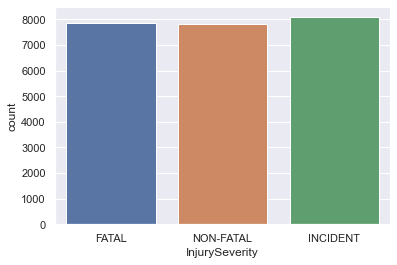

In [65]:
sb.countplot(b_train["InjurySeverity"])

<AxesSubplot:xlabel='Total.Passengers', ylabel='Injury.Severity'>

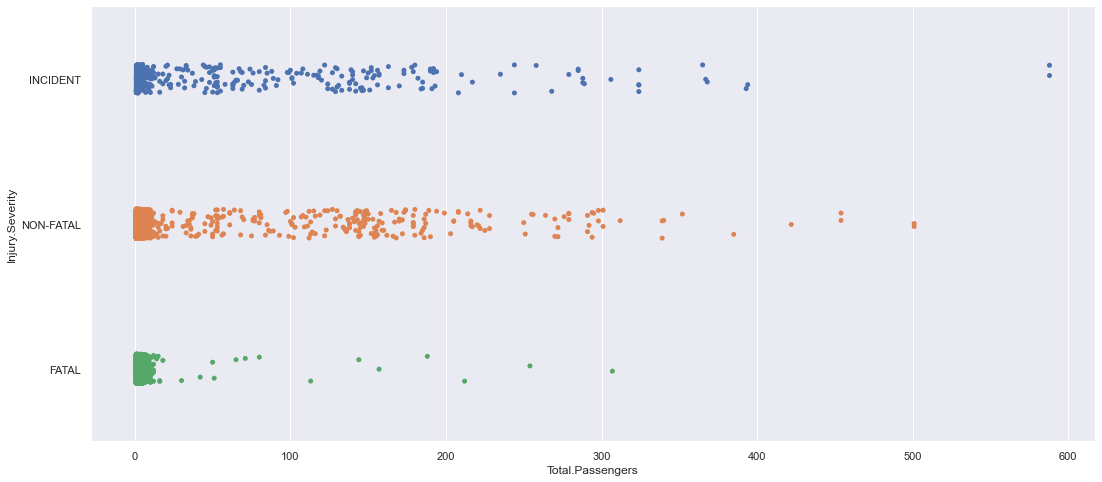

In [66]:
f, axes = plt.subplots(figsize=(18, 8))
sb.stripplot(x = "Total.Passengers", y = "Injury.Severity", data = aviationData, orient = "h")

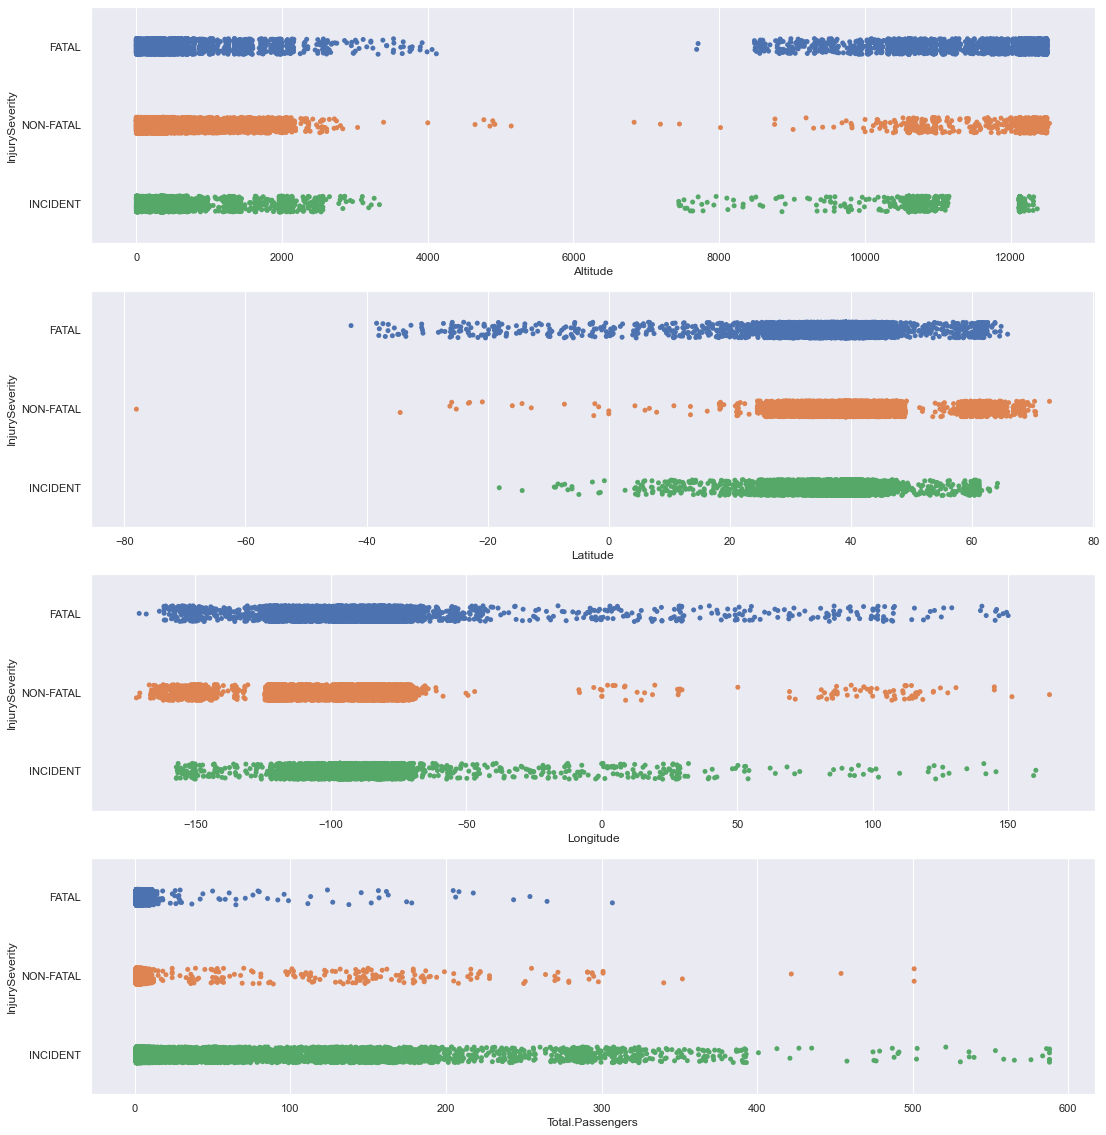

In [67]:
# Relationship between Response and the Predictors
trainDF = pd.concat([b_train, a_train.reindex(index=b_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(4, 1, figsize=(18, 20))

count = 0
for var in a_train:
    if(var == 'Weather.Condition'):
        continue
    sb.stripplot(x = var, y = "InjurySeverity", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [68]:
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(a_train, b_train)                    

b_train_pred = dectree.predict(a_train)
b_test_pred = dectree.predict(a_test)

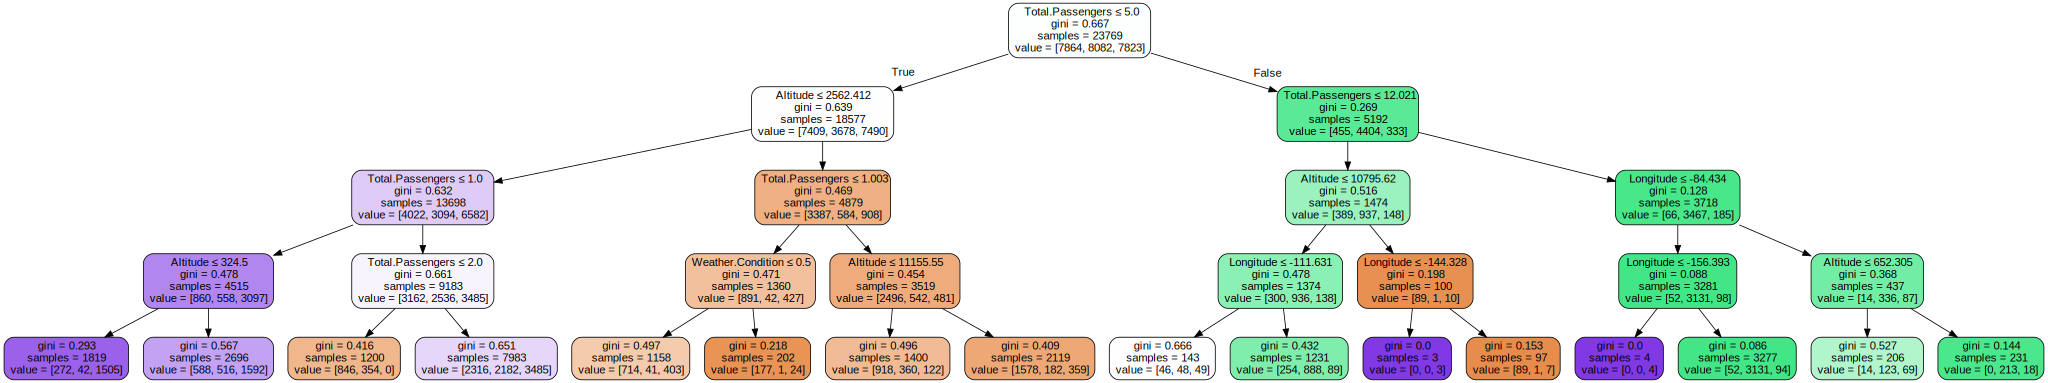

In [69]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                  
                          feature_names = a_train.columns,          
                          out_file = None,                          
                          filled = True,                    
                          rounded = True,               
                          special_characters = True)                    

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6443266439479995

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7441142416055577



<AxesSubplot:>

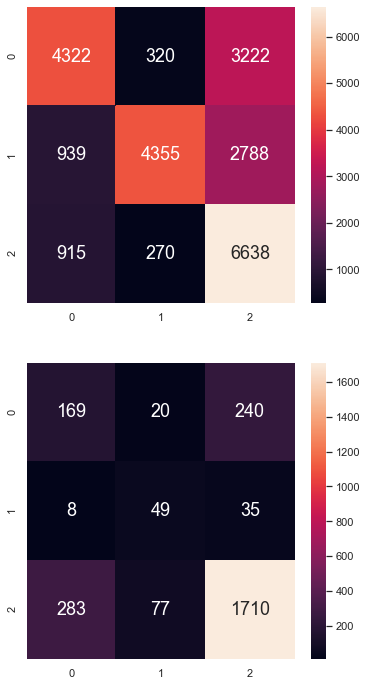

In [70]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(a_train, b_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(a_test, b_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(6, 12))
sb.heatmap(confusion_matrix(b_train, b_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(b_test, b_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [71]:
#Boosting the base tree with AdaBoost
AdaBoost = AdaBoostClassifier(base_estimator = dectree,
                              n_estimators = 125, learning_rate = 0.05)
boostModel = AdaBoost.fit(a_train,b_train)

pred = boostModel.predict(a_train)
predictions = metrics.accuracy_score(b_train,pred)
print("prediction accuracy of the train set is: ",predictions*100,"%")

pred = boostModel.predict(a_test)
predictions = metrics.accuracy_score(b_test,pred)
print("prediction accuracy of the test set is: ",predictions*100,"%")

/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


prediction accuracy of the train set is:  74.58454289200219 %
prediction accuracy of the test set is:  70.0887688151293 %
